# Assignment 3
<br> <div style="text-align:right">Janice Luong <br> STA 141B <br> Feb 5, 2017</div>

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |

In [17]:
import pandas as pd
import glob
from os.path import basename

# Gets all the "Fresh" rows in each excell file and combines them into one data frame
def get_fresh_rows(path):
    # Gets all the file names in whatever folder you ask for (the path)
    all_files = glob.glob(path + "/*.xlsx")
    # Set the column names
    column_names = ['type', 'food', 'form','price_per_lb', 'yield', 'price_per_cup', 'lb_per_cup']
    # Create an empty data frame and rename the columns
    fresh_data = pd.DataFrame(columns = column_names)
    
    # For each file, grab the type, food, form, price_per_lb...
    for file_ in all_files:
        panda_file = pd.read_excel(file_)
        # Start from the 3rd row, which is where the first "Fresh" row is at
        for panda_row in range(2, panda_file.shape[0]):
            # If the row does not contain the word "Fresh", which is returned as -1, ignore it and move on.
            if str(panda_file.iloc[panda_row][0]).lower().find("fresh") == -1:
                continue
            # Create an empty list that will later be turned into a data frame then combined with the rest of the data
            row = list()
            # Get the food type from the file name, which appears before a back slash
            row.append(file_.split('\\')[0]) # type
            # Get the food name from the file name and add it to the end of the list, which appears before a period
            row.append(basename(file_).split('.')[0]) # food
            # Get the for, price_per_lb, etc.. and add it to the end of list
            row.append(panda_file.iloc[panda_row][0]) # form
            row.append(panda_file.iloc[panda_row][1]) # price_per_lb
            row.append(panda_file.iloc[panda_row][3]) # yield
            row.append(panda_file.iloc[panda_row][4]) # lb_per_cup
            row.append(panda_file.iloc[panda_row][6]) # price_per_cup
            
            # Put in all the rows from variable row and rename the column names
            row_df = pd.DataFrame([row], columns = column_names)
            fresh_data = pd.concat([fresh_data, row_df])
    return fresh_data

# Get all the "Fesh" rows in the fruit excell files
fruit_fresh = get_fresh_rows('fruit')
fruit_fresh.head()

,type,food,form,price_per_lb,yield,price_per_cup,lb_per_cup
0,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
0,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
0,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
0,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
0,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

In [18]:
# Get all the "Fesh" rows in the vegetables excell files
veggie_fresh = get_fresh_rows('vegetables')
veggie_fresh.head()

,type,food,form,price_per_lb,yield,price_per_cup,lb_per_cup
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.155360
0,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
0,vegetables,artichoke,1Includes globe and french artichokes; exclude...,NaN,NaN,NaN,NaN
0,vegetables,asparagus,Fresh1,3.21349,0.493835,0.396832,2.582272
0,vegetables,asparagus,1Includes green asparagus. It is assumed that ...,NaN,NaN,NaN,NaN


No, the prices for tomatos are not correct. This is because the "Fresh" row for the tomatos file does not contain any data on the prices. 

Yes, other files, such as broccoli, are also having the same issue as the tomato file because their "Fresh" rows also do not contain any data on the prices.

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [27]:
# Removes rows without a price from the vegetable and fruit data frame
veggie_fresh = veggie_fresh.dropna()
fruit_fresh = fruit_fresh.dropna()

# Combines the fruit and vegetable data frames
all_food_fresh = pd.concat([fruit_fresh, veggie_fresh])

# Converts all numeric columns from column 4 and on to floats.
for col in all_food_fresh.columns[3:]:
    all_food_fresh[col] = all_food_fresh[col].apply(float)

all_food_fresh.head()

,type,food,form,price_per_lb,yield,price_per_cup,lb_per_cup
0,fruit,apples,Fresh1,1.567515,0.90,0.242508,0.422373
0,fruit,apricots,Fresh1,3.040072,0.93,0.363763,1.189102
0,fruit,bananas,Fresh1,0.566983,0.64,0.330693,0.292965
0,fruit,blackberries,Fresh1,5.774708,0.96,0.319670,1.922919
0,fruit,blueberries,Fresh1,4.734622,0.95,0.319670,1.593177


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?


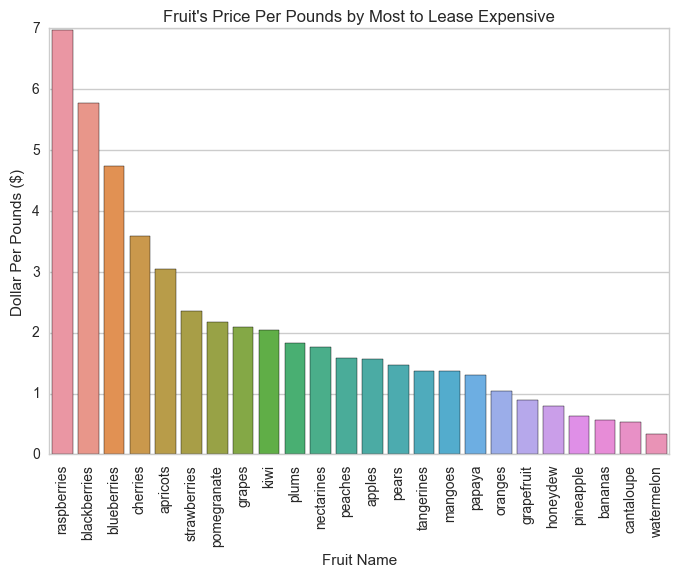

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make a bar plot of all the fruits, sorting them from most expensive to cheapest in price per pound
sns.set_style("whitegrid")
fruit_bar = sns.barplot(x = "food", y = "price_per_lb", data = fruit_fresh.sort_values(by = fruit_fresh.columns[3], ascending = False))
for item in fruit_bar.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Fruit\'s Price Per Pounds by Most to Lease Expensive')
fruit_bar.set(ylabel = 'Dollar Per Pounds ($)', xlabel = 'Fruit Name')
sns.plt.show()

The plot above shows the price of fruit per lbs from most to least expensive. 

I went with per pound instead of per cup because it is more important to know how heavy an item is than how much volumn it can fill (cup). For example, a cup can fit more paper clips than a cup of grapes. From the scatter plot above, the most expensive item per pound is to the most right of the plot. <b>Raspberries, blackberries, blueberries, cherries and apricots</b> are the most expensive fruits per pound.

The least expensive fruits per pround is to the most left of the plot. <b>Watermelon, cantaloupe, bananas, pineapple and honeydew</b> are the most expensive fruits per pound.

* How do the price distributions compare for fruit and vegetables?


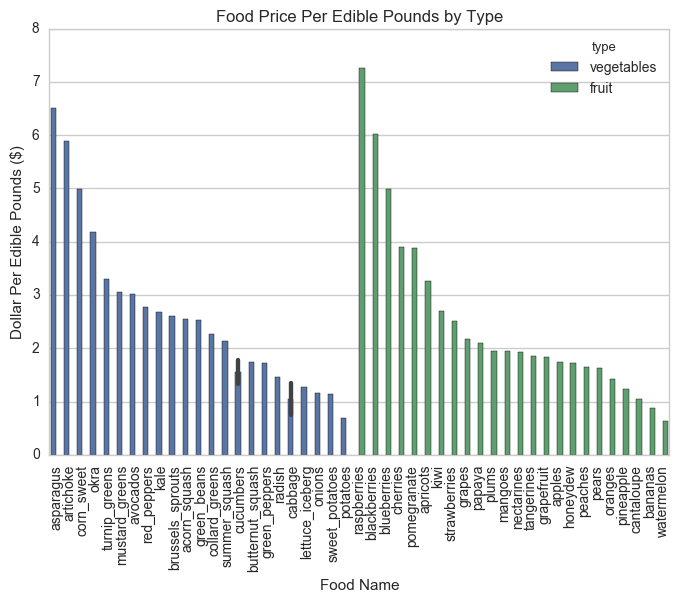

In [23]:
all_food_fresh_edible = all_food_fresh.copy()

# Get the price per lb-yield. This gives what the actual dollar cost per edible lb amount.
all_food_fresh_edible["edible_price_per_lb"] = all_food_fresh_edible["price_per_lb"] / all_food_fresh_edible["yield"]

all_bar = sns.barplot(x = "food", y = "edible_price_per_lb", hue = "type", data = all_food_fresh_edible.sort_values(by = ['type', 'edible_price_per_lb'], ascending = False))
for item in all_bar.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Food Price Per Edible Pounds by Type')
all_bar.set(ylabel = 'Dollar Per Edible Pounds ($)', xlabel = 'Food Name')
sns.plt.show()

The plot above shows the dollar per edible pounds of all the foods. The foods are seperated based the type (vegetables or fruit). The left are vegetables and the right are fruits. Once seperated, the food is then sorted from most to least expensive dollar per edible pounds. The cucumbers and cabbage have a black vertical bar because their excell file contained two "Fresh" rows, so the prices overlap. 

Cumcumbers have two "Fresh" rows because there is a "Fresh, consumed with peel" and a "Fresh, peeled". Cabbage has two "Fresh rows because there is a "Fresh green cabbage" and a "Fresh red cabbage"

I divided the price per lb by yield $ = \frac{\text{price}}{\text{lbs}} \div \text{yield}$, which comes out to be $\frac{\text{price}}{\text{lb}} \cdot \frac{1}{\text{yield}}$ to that way I can have $\frac{\text{price}}{\text{lbs} \cdot \text{yield}}$. This gives us how much each food item costs if we were considering only the edible parts of the fruit (eg. we do not eat the core of the appled so only ~90% (or 0.90) of the apple is edible). The edible_price_per_lb can also be viewed as "biggest bang for the buck" or the true value of what people are paying for since we pay for non-edible parts, but is not consumed. 

The most expensive vegetable, which is asparagus, is cheaper than the most expensive fruit, which is raspberries. But the middle of fruits prices per lb are cheaper than compared to the middle of the vegetable prices per lb.

* Which foods are the best value for the price?


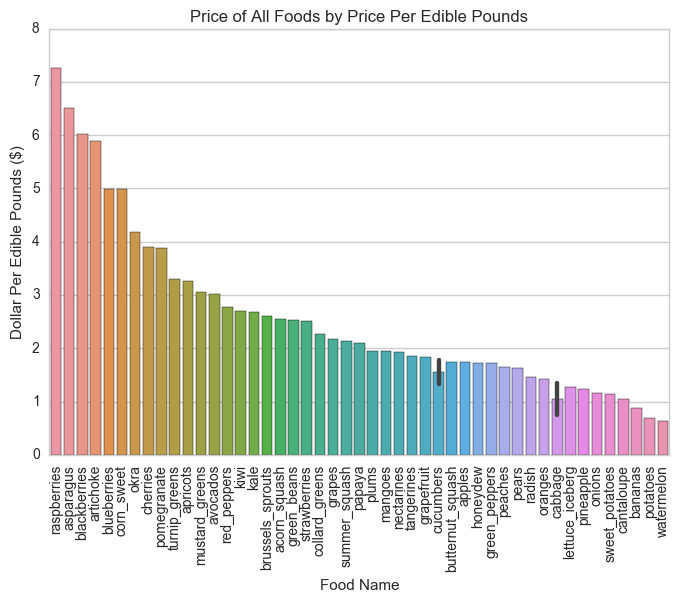

In [25]:
# Create a bar plot to show the most expensive food for dollar per edible lb.
sns.set_style("whitegrid")
edible_bar = sns.barplot(x = "food", y = "edible_price_per_lb", data = all_food_fresh_edible.sort_values(by = all_food_fresh_edible.columns[7], ascending = False))
for item in edible_bar.get_xticklabels():
    item.set_rotation(90)
sns.plt.title('Price of All Foods by Price Per Edible Pounds')
edible_bar.set(ylabel = 'Dollar Per Edible Pounds ($)', xlabel = 'Food Name')
sns.plt.show()

The plot above shows all the food, sorted by most to least expensive dollar per edible pounds. This shows the true value people are paying for since not all parts of the food are edible. As mentioned earlier, the cucumbers and cabbage have a black vertical bar because their excell file contained two "Fresh" rows, so the prices overlap.  

The foods that are the best value for its price are <b>watermelon, potatoes, cabbage, bananas, cantaloupes and sweet potatoes</b>. 

* What's something surprising about this data set?


I was surprised how cheap watermelons were per pound. Normally, whenever I am shopping at Safeway they seemed expensive ($5 for a small personal watermelon). I was also shocked to see that fruits were in generally cheaper than vegetables because fruits are more heavy in yield (edible parts).

* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

I think foods with the most amount of carbohydrates have the best price, yield and nutrition because carhohydrates make you feel good and more full. So food such as sweet potatoes, potatoes and bananas would give us the best combination of price, yield and mutrition. 